In [22]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [2]:
checkin = pd.read_pickle("../data/check_in.pkl")
checkin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2562 entries, 0 to 2561
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   Date           2562 non-null   datetime64[ns, UTC]
 1   Business Name  2562 non-null   object             
 2   Longitude      2562 non-null   float64            
 3   Latitude       2562 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(2), object(1)
memory usage: 80.2+ KB


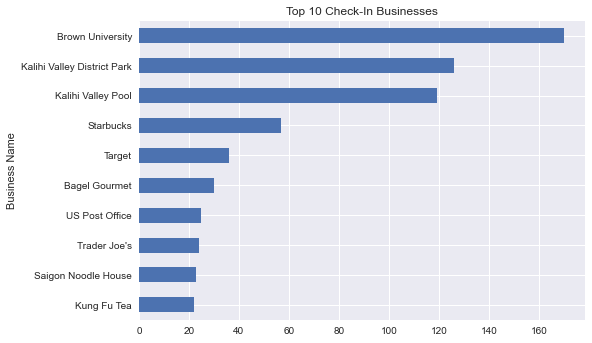

In [3]:
matplotlib.style.use('seaborn')
plot = checkin.groupby("Business Name").size().sort_values(ascending=False)[0:10][::-1].plot(kind='barh', title="Top 10 Check-In Businesses")

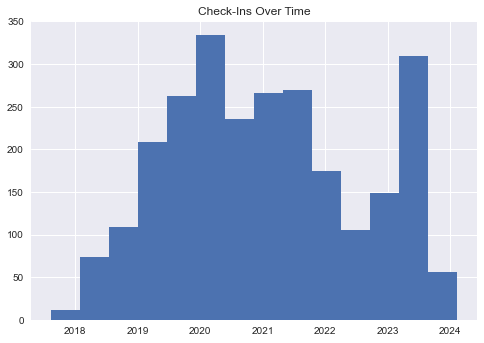

In [4]:
plt.hist(checkin["Date"], bins=14)
plt.title("Check-Ins Over Time")
plt.show()

In [17]:
fig = px.scatter_mapbox(checkin, 
                        lat = checkin["Latitude"], 
                        lon = checkin["Longitude"], 
                        hover_name = "Business Name", 
                        hover_data = {"Latitude":False, "Longitude":False},
                        zoom = 2, 
                        height = 600,
                        width = 800)
#fig.update_layout(mapbox_style = "open-street-map")
#fig.update_layout(margin = {"r":0,"t":0,"l":0,"b":0})
#fig.show()

In [28]:
crs = {'init':'epsg:4326'}
geometry = [Point(xy) for xy in zip(checkin['Longitude'], checkin['Latitude'])]
geo_checkin = gpd.GeoDataFrame(checkin,
                               crs=crs,
                               geometry=geometry)
geo_checkin.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2562 entries, 0 to 2561
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   Date           2562 non-null   datetime64[ns, UTC]
 1   Business Name  2562 non-null   object             
 2   Longitude      2562 non-null   float64            
 3   Latitude       2562 non-null   float64            
 4   geometry       2562 non-null   geometry           
dtypes: datetime64[ns, UTC](1), float64(2), geometry(1), object(1)
memory usage: 100.2+ KB


<AxesSubplot:>

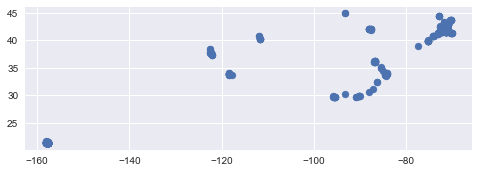

In [31]:
geo_checkin.plot()